In [1]:
import torch
from train_dnn_seg import prepare_dataloader

configs = {
    "window_duration": 0.04,
    "window_shift": 0.02,
    "n_frames": 49,
    "n_mels": 40,
    "n_feature": 40,
    "feature_type": "logfbanks",
    "learing_rate": 0.001,
    "batch_size": 64,       # 64*10=640
    "p_dropout": 0,
    "model_type": "cnn"
}
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")

train_loader, dev_loader, eval_loader = prepare_dataloader(configs)
print("Data preparing done")

(3008, 10, 49, 40)
(379, 10, 49, 40)
(330, 10, 49, 40)
train:	3008, 47
dev:	379, 6
eval:	330, 6
Data preparing done


In [2]:
from train_dnn_seg import train
from dnn_model import CNN1

model = CNN1(is_bn=True).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg_fb/cnn1/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=5)

model preparing done
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.S

In [3]:
from train_dnn_seg import eval_step
from dnn_model import CNN1

epochs = len(train_loss_list)
for e in range(epochs):
    test_model = CNN1().to(device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4858, wav=0.5061
2-test accurary: segs=0.5091, wav=0.5485
3-test accurary: segs=0.4997, wav=0.5273
4-test accurary: segs=0.5085, wav=0.5303
5-test accurary: segs=0.5424, wav=0.5788
6-test accurary: segs=0.5124, wav=0.5515
7-test accurary: segs=0.5291, wav=0.5667
8-test accurary: segs=0.5485, wav=0.6000
9-test accurary: segs=0.5200, wav=0.5424
10-test accurary: segs=0.5558, wav=0.6303
11-test accurary: segs=0.5527, wav=0.6121
12-test accurary: segs=0.5139, wav=0.5606
13-test accurary: segs=0.5458, wav=0.6030
14-test accurary: segs=0.5279, wav=0.5818
15-test accurary: segs=0.5167, wav=0.5788
16-test accurary: segs=0.5421, wav=0.6000
17-test accurary: segs=0.5418, wav=0.6212
18-test accurary: segs=0.5455, wav=0.6030
19-test accurary: segs=0.5439, wav=0.6091
20-test accurary: segs=0.5321, wav=0.5970
21-test accurary: segs=0.5530, wav=0.6303
22-test accurary: segs=0.5439, wav=0.6242
23-test accurary: segs=0.5282, wav=0.6303
24-test accurary: segs=0.5579, wav=0.6212


In [6]:
from train_dnn_seg import train
from dnn_model import CNN2

model = CNN2(in_channels=1, is_bn=True).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg_fb/cnn2/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=5)

model preparing done
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.S

In [8]:
from train_dnn_seg import eval_step
from dnn_model import CNN2

epochs = len(train_loss_list)
for e in range(epochs):
    test_model = CNN2().to(device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4221, wav=0.4364
2-test accurary: segs=0.4730, wav=0.5182
3-test accurary: segs=0.5124, wav=0.5242
4-test accurary: segs=0.5018, wav=0.5606
5-test accurary: segs=0.5027, wav=0.5212
6-test accurary: segs=0.5148, wav=0.5697
7-test accurary: segs=0.5270, wav=0.5879
8-test accurary: segs=0.5197, wav=0.5727
9-test accurary: segs=0.5318, wav=0.5788
10-test accurary: segs=0.5242, wav=0.5939
11-test accurary: segs=0.5242, wav=0.5939
12-test accurary: segs=0.5312, wav=0.5758
13-test accurary: segs=0.5167, wav=0.5667
14-test accurary: segs=0.5179, wav=0.5727
15-test accurary: segs=0.5279, wav=0.6061
16-test accurary: segs=0.5136, wav=0.5788
17-test accurary: segs=0.5294, wav=0.6121
18-test accurary: segs=0.5406, wav=0.5970
19-test accurary: segs=0.5282, wav=0.5939
20-test accurary: segs=0.5282, wav=0.5818
21-test accurary: segs=0.5291, wav=0.5848
22-test accurary: segs=0.5239, wav=0.5606
23-test accurary: segs=0.5324, wav=0.6000
24-test accurary: segs=0.5376, wav=0.5818
2

In [9]:
from train_dnn_seg import train
from dnn_model import CNN3

model = CNN3(in_channels=1, is_bn=True).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
modelpath = "/data/lujd/algorithm2022/model/seg_fb/cnn3/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.S

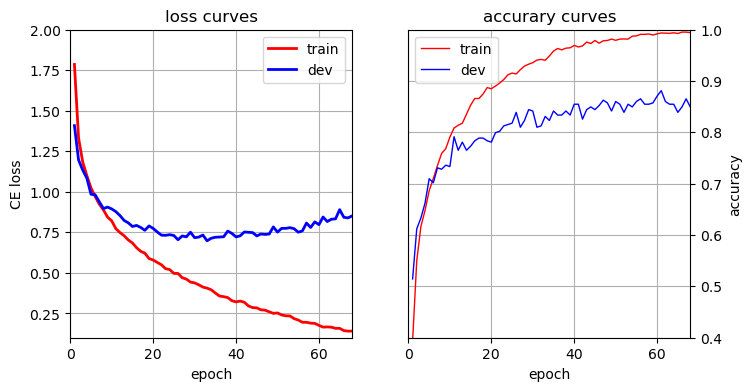

In [11]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_wav_list, dev_loss_list, dev_acc_wav_list)

In [10]:
from train_dnn_seg import eval_step
from dnn_model import CNN3

epochs = len(train_loss_list)
for e in range(epochs):
    test_model = CNN3().to(device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4755, wav=0.5212
2-test accurary: segs=0.5055, wav=0.5515
3-test accurary: segs=0.4897, wav=0.5152
4-test accurary: segs=0.5142, wav=0.5606
5-test accurary: segs=0.5230, wav=0.5818
6-test accurary: segs=0.5136, wav=0.5424
7-test accurary: segs=0.5152, wav=0.5606
8-test accurary: segs=0.5236, wav=0.5818
9-test accurary: segs=0.5197, wav=0.5697
10-test accurary: segs=0.5021, wav=0.5424
11-test accurary: segs=0.5173, wav=0.5697
12-test accurary: segs=0.5270, wav=0.5939
13-test accurary: segs=0.5336, wav=0.5970
14-test accurary: segs=0.5142, wav=0.5545
15-test accurary: segs=0.5355, wav=0.5879
16-test accurary: segs=0.5439, wav=0.5970
17-test accurary: segs=0.5339, wav=0.5788
18-test accurary: segs=0.5439, wav=0.6030
19-test accurary: segs=0.5188, wav=0.5758
20-test accurary: segs=0.5152, wav=0.5788
21-test accurary: segs=0.5494, wav=0.6121
22-test accurary: segs=0.5600, wav=0.6121
23-test accurary: segs=0.5361, wav=0.5970
24-test accurary: segs=0.5173, wav=0.5636
2

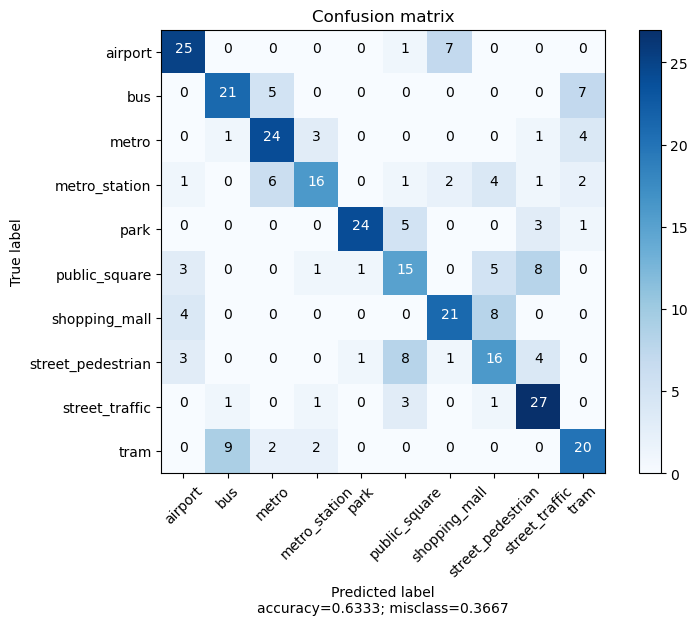

In [13]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
unique_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
                 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

test_model = CNN3(in_channels=1, is_bn=True).to(device)
modelpath = "/data/lujd/algorithm2022/model/seg_fb/cnn3/"
modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], 58)
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, device)
eval_cm = confusion_matrix(true_label_list, pre_label_list)
plot_confusion_matrix(eval_cm, unique_labels)

In [18]:
from train_dnn_seg import train
from dnn_model import CNN1

model = CNN1(in_channels=1, is_bn=False).to(device)
print("model preparing done")

configs["learing_rate"] = 0.0005
configs["model_type"] = "cnn"
modelpath = "/data/lujd/algorithm2022/model/seg_fb/cnn1_new/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.S

In [19]:
from train_dnn_seg import eval_step
from dnn_model import CNN1

epochs = len(train_loss_list)
for e in range(epochs):
    test_model = CNN1(in_channels=1, is_bn=False).to(device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.3958, wav=0.4061
2-test accurary: segs=0.4073, wav=0.4333
3-test accurary: segs=0.3848, wav=0.3909
4-test accurary: segs=0.4130, wav=0.4212
5-test accurary: segs=0.4406, wav=0.4576
6-test accurary: segs=0.4682, wav=0.5000
7-test accurary: segs=0.5052, wav=0.5424
8-test accurary: segs=0.4827, wav=0.5152
9-test accurary: segs=0.5342, wav=0.5909
10-test accurary: segs=0.3748, wav=0.3636
11-test accurary: segs=0.5006, wav=0.5424
12-test accurary: segs=0.4942, wav=0.5364
13-test accurary: segs=0.4627, wav=0.5121
14-test accurary: segs=0.4900, wav=0.5485
15-test accurary: segs=0.4939, wav=0.5667
16-test accurary: segs=0.4555, wav=0.4727
17-test accurary: segs=0.5112, wav=0.5606
18-test accurary: segs=0.4942, wav=0.5606
19-test accurary: segs=0.4897, wav=0.5273
20-test accurary: segs=0.4655, wav=0.5152
21-test accurary: segs=0.4100, wav=0.4515
22-test accurary: segs=0.5048, wav=0.5606
23-test accurary: segs=0.4579, wav=0.5152
24-test accurary: segs=0.5133, wav=0.5848
2

---
best model

In [24]:
from train_dnn_seg import train
from dnn_model import CNN3

model = CNN3().to(device)
print("model preparing done")

configs["learing_rate"] = 0.0004
configs["model_type"] = "cnn"
modelpath = "/data/lujd/algorithm2022/model/seg_fb/cnn3/"
(train_loss_list, train_acc_list, train_acc_wav_list,
    dev_loss_list, dev_acc_list, dev_acc_wav_list) = train(
                                                            model, train_loader, dev_loader,
                                                            configs, device, modelpath, early_stop=10)

model preparing done
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.Size([640])
feature size: torch.Size([64, 10, 49, 40])->torch.Size([640, 1, 49, 40])torch.S

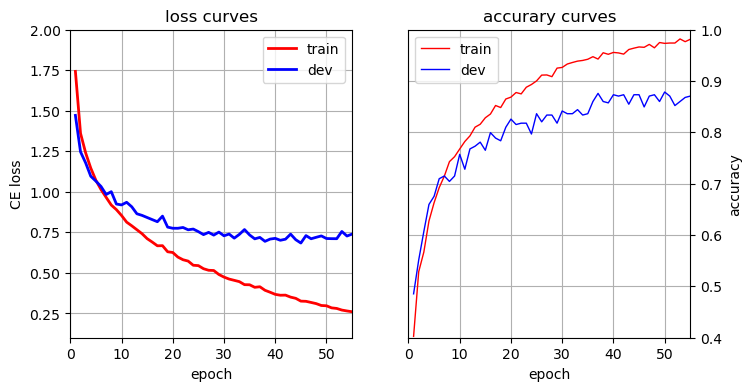

In [25]:
from utils import plot_loss_acc_curve
plot_loss_acc_curve(train_loss_list, train_acc_wav_list, dev_loss_list, dev_acc_wav_list)

In [26]:
from train_dnn_seg import eval_step
from dnn_model import CNN3

epochs = len(train_loss_list)
for e in range(epochs):
    test_model = CNN3().to(device)
    modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], e+1)
    test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)

    eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, device)
    print("{}-test accurary: segs={:.4f}, wav={:.4f}".format(e+1,eval_acc,eval_acc_wav))

1-test accurary: segs=0.4533, wav=0.4848
2-test accurary: segs=0.4861, wav=0.5394
3-test accurary: segs=0.5027, wav=0.5333
4-test accurary: segs=0.5236, wav=0.5576
5-test accurary: segs=0.5248, wav=0.5667
6-test accurary: segs=0.5242, wav=0.5576
7-test accurary: segs=0.5315, wav=0.5758
8-test accurary: segs=0.5106, wav=0.5636
9-test accurary: segs=0.5452, wav=0.5848
10-test accurary: segs=0.5355, wav=0.5879
11-test accurary: segs=0.5309, wav=0.5879
12-test accurary: segs=0.5073, wav=0.5576
13-test accurary: segs=0.5470, wav=0.6000
14-test accurary: segs=0.5242, wav=0.5697
15-test accurary: segs=0.5309, wav=0.5909
16-test accurary: segs=0.5248, wav=0.5879
17-test accurary: segs=0.5352, wav=0.5879
18-test accurary: segs=0.5188, wav=0.5848
19-test accurary: segs=0.5361, wav=0.5909
20-test accurary: segs=0.5288, wav=0.5970
21-test accurary: segs=0.5430, wav=0.6000
22-test accurary: segs=0.5470, wav=0.5909
23-test accurary: segs=0.5436, wav=0.6212
24-test accurary: segs=0.5312, wav=0.5848
2

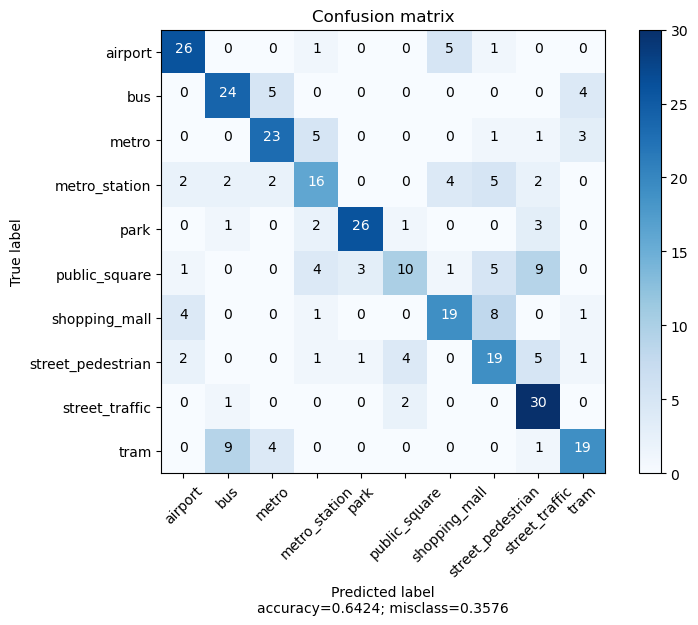

In [27]:
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix
unique_labels = ['airport', 'bus', 'metro', 'metro_station', 'park', 'public_square',
                 'shopping_mall', 'street_pedestrian', 'street_traffic', 'tram']

test_model = CNN3(in_channels=1, is_bn=True).to(device)
modelpath = "/data/lujd/algorithm2022/model/seg_fb/cnn3/"
modelname = "model_lr{}_B{}_p{}_ep{}.pkl".format(configs["learing_rate"], configs["batch_size"], configs["p_dropout"], 49)
test_model.load_state_dict(torch.load(modelpath+modelname), strict = True)
eval_loss, eval_acc, eval_acc_wav, true_label_list, pre_label_list = eval_step(test_model, eval_loader, configs, device)
eval_cm = confusion_matrix(true_label_list, pre_label_list)
plot_confusion_matrix(eval_cm, unique_labels)